$\hspace{1.5cm}k,a\hspace{2cm}m\hspace{1.5cm} k_0,a_0\hspace{1.5cm}m\hspace{1.5cm}k,a$

$\bigg |\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/O\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/O\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\bigg|$

$\hspace{4.2cm}|\rightarrow\eta_1\hspace{3.2cm}|\rightarrow\eta_2$

$\eta_1,\eta_2$ displacements of the masses from their equilibrium positions.

$V=\frac{k}{2}(\eta_1)^2+\frac{k_0}{2}(\eta_2-\eta_1)^2+\frac{k}{2}(\eta_2)^2$

$T=\frac{m}{2}(\dot\eta_1^2+\dot\eta_2^2)$

$L=T-V=\frac{m}{2}(\dot\eta_1^2+\dot\eta_2^2)-\frac{k}{2}(\eta_1)^2-\frac{k_0}{2}(\eta_2-\eta_1)^2-\frac{k}{2}(\eta_2)^2$

Now the equations of motion

$\frac{d}{dt}\frac{\partial L}{\partial \dot\eta_{1,2}}=\frac{\partial L}{\partial \eta_{1,2}}$

$m\ddot \eta_1=-k\eta_1+k_0(\eta_2-\eta_1)$

$m\ddot \eta_2=-k_0(\eta_2-\eta_1)-k\eta_2$

Let's introduce $\eta_{1,2}=A_{1,2}e^{i\omega t}$

$-\omega^2 A_1=-\frac{k}{m}A_1+\frac{k_0}{m}(A_2-A_1)\hspace{1cm}\Rightarrow (\frac{k}{m}-\omega^2+\frac{k_0}{m})A_1-\frac{k_0}{m}A_2=0$

$-\omega^2 A_2=-\frac{k_0}{m}(A_2-A_1)-\frac{k}{m}A_2\hspace{1cm}\Rightarrow (\frac{k_0}{m}-\omega^2+\frac{k}{m})A_2-\frac{k_0}{m}A_1=0$

Now we can solve these equations;

$
  \left| {\begin{array}{cc}
   \frac{k}{m}-\omega^2+\frac{k_0}{m}&-\frac{k_0}{m}\\
   -\frac{k_0}{m}&\frac{k_0}{m}-\omega^2+\frac{k}{m}\\
  \end{array} } \right|
= \left| {\begin{array}{cc}
     k-m\omega^2+k_0&-k_0\\
   -k_0&k_0-m\omega^2+k\\
  \end{array} } \right|=0$

If we write $V$ and $T$ as

$V=
  \left| {\begin{array}{cc}
   k+k_0 & -k_0 \\
   -k_0 & k+k_0\\
  \end{array} } \right|
$

$T=
  \left| {\begin{array}{cc}
   m & 0 \\
   0 & m \\ 
  \end{array} } \right|
$

We can get the same result by

$| V-\omega^3T |=
\left| {\begin{array}{cc}
     k-m\omega^2+k_0&-k_0\\
   -k_0&k_0-m\omega^2+k\\
  \end{array} } \right|=0$


From the secualr equation

$(k-m\omega^2+k_0)^2-k_0^2=0$

$k-m\omega^2+k_0=\pm \hspace{1mm}k_0$

So we can get normal modes

$\omega_1 = \sqrt{\frac{k}{m}}$ and $\omega_2 = \sqrt{\frac{k+2k_0}{m}}$

The physicsl meaning of two normal modes are

$|..........o\rightarrow..........o\rightarrow...........|$ both masses oscillate in the same direction

$|.......\leftarrow o.............o\rightarrow...........|$ masses oscillates in opposite directions

Now let $m=1 kg$ and $k=4 Nm^{-1}$ and $k_0=6 Nm^{-1}$

Then $\omega_1=2 s^{-1}$ and $\omega_2=4 s^{-1}$

And let $k=1 Nm^{-1}$ and $k_0=10 Nm^{-1}$

Then $\omega_1=1 s^{-1}$ and $\omega_2=4.58 s^{-1}$

And let $k=10 Nm^{-1}$ and $k_0=1 Nm^{-1}$

Then $\omega_1=3.16  s^{-1}$ and $\omega_2=3.46 s^{-1}$

First import all the necessary packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import normal_modes as nm

Next define $T$ matrix and inverse of $T$ matrix

In [4]:
def t_mat(m):                   # T matrix
    return np.diag([m, m])

def t_inv_mat(m):               # T inverse matrix
    return np.diag([1.0/m, 1.0/m])

Next define $V$ matrix

In [16]:
def v_mat(k,k_0):
    return np.array([[ k+k_0,  -k_0], 
                     [-k_0  , k+k_0]])

Function to get the matrix which gives normal modes

In [17]:
def fun(y, t, m, k, k_0):
   
    w = -np.dot(t_inv_mat(m), np.dot(v_mat(k,k_0), y[2:]))
    
    return np.concatenate([w[:], y[:2]])

Now define the functions to solve set of equations

In [18]:
def sol(y_0, t, m, k, k_0):
    
    return odeint(fun, y_0, t, args=(m, k, k_0))

Now let's solve for case 01 where

$m=1 kg$ and $k=4 Nm^{-1}$ and $k_0=6 Nm^{-1}$

In [19]:
m = 1
k = 4
k_0=6
t_end = 20.0
delt = 12.0
num_points = 400

#initial conditions
y_0 = np.array([0.0, 0.0, 2.0, -1.0])  # this is the initial condition, particles start with zero speed.

In [20]:
time = np.linspace(0.0, t_end, num_points)

In [21]:
soln = sol(y_0, time, m, k, k_0)

In [22]:
wn = nm.NormalModes(t_mat(m), v_mat(k,k_0))

In [23]:
print('frequencies are', wn.omega)

frequencies are [ 2.  4.]


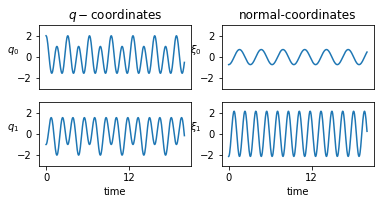

In [24]:
for ind in range(2):
    plt.subplot(321 + 2*ind)
    plt.plot(time, soln[:, 2 + ind])
    plt.ylabel(r'$q_%d$'%ind, rotation=0)
    plt.ylim([-3, 3])
    plt.xticks([])
    if ind==0:
        plt.title(r'$q-$coordinates')
plt.xticks(np.arange(0.0, t_end + 1, delt))
plt.xlabel('time')
for ind in range(2):
    plt.subplot(321 + 2*ind + 1)
    soln_norm = wn.original_2_normal(soln[:, 2:].T).T    
    plt.plot(time, soln_norm[:, ind])
    plt.ylabel(r'$\xi_%d$'%ind, rotation=0)
    plt.ylim([-3, 3])
    plt.xticks([])
    if ind==0:
        plt.title(r'normal-coordinates')
plt.xticks(np.arange(0.0, t_end + 1, delt))
plt.xlabel('time')
plt.show()

Next solve for case 02 where

$m=1 kg$ and $k=1 Nm^{-1}$ and $k_0=10 Nm^{-1}$

In [28]:
m = 1
k = 1
k_0=10
t_end = 20.0
delt = 12.0
num_points = 400

#initial conditions
y_0 = np.array([0.0, 0.0, 2.0, -1.0])  # this is the initial condition, particles start with zero speed.

In [34]:
time = np.linspace(0.0, t_end, num_points)

In [30]:
soln = sol(y_0, time, m, k, k_0)

In [31]:
wn = nm.NormalModes(t_mat(m), v_mat(k,k_0))

In [32]:
print('frequencies are', wn.omega)

frequencies are [ 1.          4.58257569]


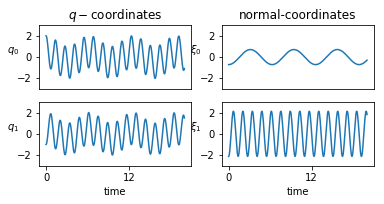

In [33]:
for ind in range(2):
    plt.subplot(321 + 2*ind)
    plt.plot(time, soln[:, 2 + ind])
    plt.ylabel(r'$q_%d$'%ind, rotation=0)
    plt.ylim([-3, 3])
    plt.xticks([])
    if ind==0:
        plt.title(r'$q-$coordinates')
plt.xticks(np.arange(0.0, t_end + 1, delt))
plt.xlabel('time')
for ind in range(2):
    plt.subplot(321 + 2*ind + 1)
    soln_norm = wn.original_2_normal(soln[:, 2:].T).T    
    plt.plot(time, soln_norm[:, ind])
    plt.ylabel(r'$\xi_%d$'%ind, rotation=0)
    plt.ylim([-3, 3])
    plt.xticks([])
    if ind==0:
        plt.title(r'normal-coordinates')
plt.xticks(np.arange(0.0, t_end + 1, delt))
plt.xlabel('time')
plt.show()

Finally solve for case 03 where

$m=1 kg$ and $k=10 Nm^{-1}$ and $k_0=1 Nm^{-1}$

In [58]:
m = 1
k = 10
k_0=1
t_end = 50.0
delt = 12.0
num_points = 400

#initial conditions
y_0 = np.array([0.0, 0.0, 2.0, -1.0])  # this is the initial condition, particles start with zero speed.

In [59]:
time = np.linspace(0.0, t_end, num_points)

In [60]:
soln = sol(y_0, time, m, k, k_0)

In [61]:
wn = nm.NormalModes(t_mat(m), v_mat(k,k_0))

In [62]:
print('frequencies are', wn.omega)

frequencies are [ 3.16227766  3.46410162]


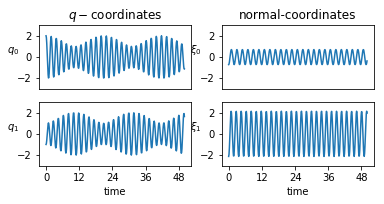

In [63]:
for ind in range(2):
    plt.subplot(321 + 2*ind)
    plt.plot(time, soln[:, 2 + ind])
    plt.ylabel(r'$q_%d$'%ind, rotation=0)
    plt.ylim([-3, 3])
    plt.xticks([])
    if ind==0:
        plt.title(r'$q-$coordinates')
plt.xticks(np.arange(0.0, t_end + 1, delt))
plt.xlabel('time')
for ind in range(2):
    plt.subplot(321 + 2*ind + 1)
    soln_norm = wn.original_2_normal(soln[:, 2:].T).T    
    plt.plot(time, soln_norm[:, ind])
    plt.ylabel(r'$\xi_%d$'%ind, rotation=0)
    plt.ylim([-3, 3])
    plt.xticks([])
    if ind==0:
        plt.title(r'normal-coordinates')
plt.xticks(np.arange(0.0, t_end + 1, delt))
plt.xlabel('time')
plt.show()

Here we can observe the beat frequency because $\omega_1$ ~ $\omega_2$